In [2]:
import pandas as pd
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = pd.read_csv('./staging/titanic.csv')

In [4]:
print("Titanic - ", titanic.columns)

titanic -  Index(['classe', 'sobrevivente', 'nome', 'sexo', 'idade', 'parente_2',
       'parente_1', 'bilhete', 'tarifa', 'cabine', 'embarcado', 'bote',
       'corpo', 'destino'],
      dtype='object')


In [5]:
titanic.head()

,classe,sobrevivente,nome,sexo,idade,parente_2,parente_1,bilhete,tarifa,cabine,embarcado,bote,corpo,destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
#lista de colunas com dados nulos
titanic.columns[titanic.isna().any()].tolist()

['idade', 'tarifa', 'cabine', 'embarcado', 'bote', 'corpo', 'destino']

In [7]:
# Transforma a coluna sex (sexo) em female - F e male - M 
titanic['sexo'] = titanic.sexo.replace({
    'female':'F',
    'male':'M'
})

In [8]:
# Transforma a coluna survived (sobrevivente) em 1 - sim e 0 - nao 
titanic['sobrevivente'] = titanic.sobrevivente.replace({
    0:'nao',
    1:'sim'
})

In [9]:
#quantas pessoas sem idade estam na planilha
titanic['idade'].isna().sum()

263

In [10]:
# Preencher os valores nulos(NaN) com 0
titanic['idade'].fillna(0.0, inplace=True)

In [11]:
# preenche os valores nulos
titanic['tarifa'].fillna(0.0, inplace=True)

In [12]:
# muda os dados da coluna cabine para 'NAO INFORMADO' quando os dodos sao nulos
titanic['cabine'].fillna('Nao informado', inplace=True)

In [13]:
#peenche a coluna 'embarcado' para o nome completo das cidades
titanic['embarcado'] = titanic['embarcado'].replace({
    'C':'Cherbourg', 
    'Q': 'Queenstown', 
    'S': 'Southampton',
     np.nan: "Nao informado"
})

In [14]:
# na coluna destino alterase os dados nulos para 'nao informado'
titanic['destino'].fillna('Nao informado', inplace=True)

In [15]:
# muda os dados da coluna bote para 'nao usou bote' para dados nulos
titanic['bote'].fillna('NAO USOU BOTE', inplace=True)

In [16]:
# converter a coluna 'corpo' para string
titanic['corpo'] = titanic['corpo'].astype(str)

In [17]:
# verifica se na coluna 'sobrevivente' se está 'sim' entao na coluna 'corpo' colocase 'Sobrevivente'
titanic.loc[titanic['sobrevivente']=='sim', 'corpo'] = 'Sobrevivente'

In [18]:
#verifica se na coluna 'sobrevivente' se está 'nao' entao na coluna 'corpo' colocase 'corpo encontrado', quando se tem um numero
titanic.loc[(titanic['sobrevivente'] == 'nao') & (titanic['corpo'].notna()), 'corpo'] = 'Corpo encontrado'

In [19]:
# coloca na coluna corpo 'corpo nao encontrado' se na coluna corpo estiver dados nulos.
titanic['corpo'].fillna('Corpo nao encontrado', inplace=True)

In [20]:
#Função para retirar o Mr., Miss. ... do nome e colocar o ultimo nome no final
def rearrange_name(name):
    parts = name.split(", ")
    if len(parts) < 2:
        return name
    
    last_name = parts[0].strip()
    first_names = parts[1]
    
    # Remover o cumprimento do primeiro nome
    if first_names.startswith("Miss. ") or first_names.startswith("Mr. ") or first_names.startswith("Mrs. ") or first_names.startswith("Dr. ") or first_names.startswith("Master. "):
        first_names = first_names.split(". ")[1]
    
    rearranged_name = f"{first_names} {last_name}"
    
    return rearranged_name

In [21]:
# Aplicar a função 'rearrange_name' na coluna 'nome' do DataFrame
titanic['nome'] = titanic['nome'].apply(rearrange_name)

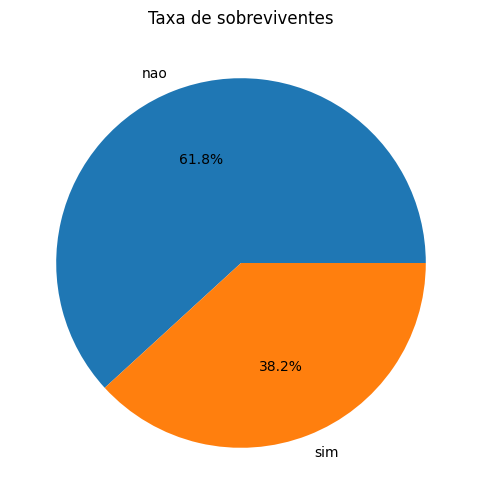

In [22]:
# Gráfico de barras para contar sobreviventes
plt.figure(figsize=(8, 6))
titanic['sobrevivente'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Taxa de sobreviventes')
plt.ylabel('')
plt.show()


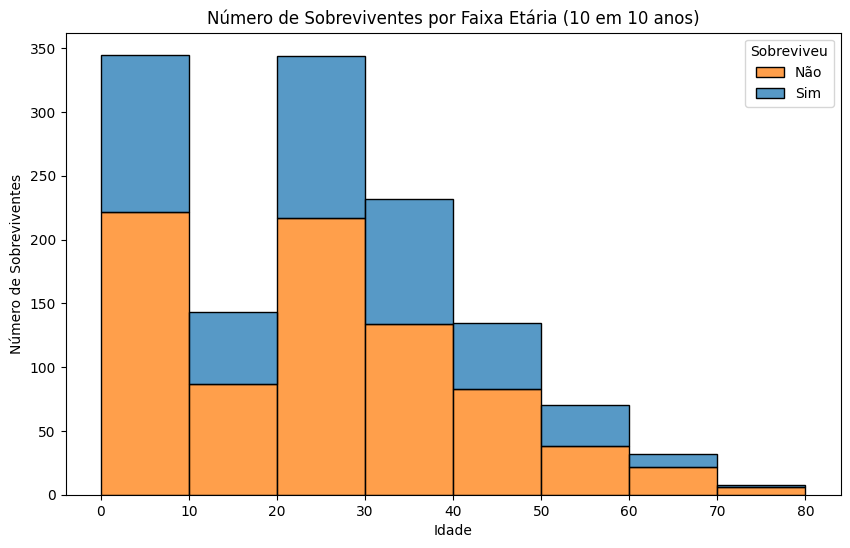

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='idade', hue='sobrevivente', bins=8, multiple='stack')
plt.title('Número de Sobreviventes por Faixa Etária (10 em 10 anos)')
plt.xlabel('Idade')
plt.ylabel('Número de Sobreviventes')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()


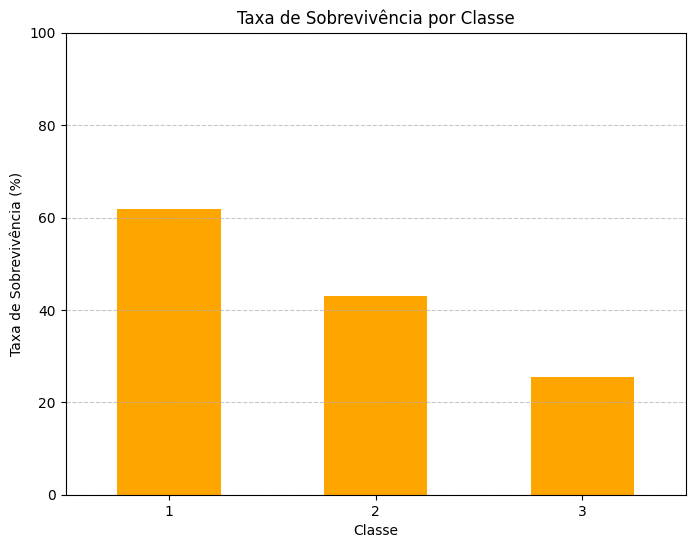

In [24]:
# convertendo 'sim' e 'não' para valores booleanos
copy = titanic.copy()
copy['sobrevivente'] = copy['sobrevivente'].map({'sim': True, 'nao': False})

# calculando a taxa de sobrevivência por classe
survival_rates = copy.groupby('classe')['sobrevivente'].mean() * 100

# criando o gráfico de barras
plt.figure(figsize=(8, 6))
survival_rates.plot(kind='bar', color='orange')
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.xticks(rotation=0)  # rotacionar os rótulos do eixo x para melhor visualização
plt.ylim(0, 100)  # definir o limite do eixo y de 0% a 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
#está criando novas tabelas, para facilitar a analise de dados mais especificos
ftTitanic=titanic[['bilhete','nome','sexo','idade','sobrevivente']] 
dtViagem=titanic[['bilhete','cabine', 'embarcado', 'destino', 'classe','tarifa']]
dtFamilia=titanic[['bilhete','parente_1', 'parente_2']]
dtResgate=titanic[['bilhete','corpo','bote']]

In [26]:
#Esses comandos estão exportando os DataFrames para arquivos CSV e salvando-os no diretório..
ftTitanic.to_csv('./refined/ftTitanic.csv', index=False)
dtViagem.to_csv('./refined/dtViagem.csv', index=False)
dtFamilia.to_csv('./refined/dtFamilia.csv', index=False)
dtResgate.to_csv('./refined/dtResgate.csv', index=False)